# Introduction to Non-Personalized Recommenders

## The recommendation problem

Recommenders have been around since at least 1992. Today we see different flavours of recommenders, deployed across different verticals: 

- Amazon
- Netflix
- Facebook
- Last.fm.

What exactly do they do?

### Definitions from the literature

*In a typical recommender system people provide recommendations as inputs, which
the system then aggregates and directs to appropriate recipients.* -- Resnick
and Varian, 1997

*Collaborative filtering simply means that people collaborate to help one
another perform filtering by recording their reactions to documents they read.*
-- Goldberg et al, 1992

*In its most common formulation, the recommendation problem is reduced to the
problem of estimating ratings for the items that have not been seen by a
user. Intuitively, this estimation is usually based on the ratings given by this
user to other items and on some other information [...] Once we can estimate
ratings for the yet unrated items, we can recommend to the user the item(s) with
the highest estimated rating(s).* -- Adomavicius and Tuzhilin, 2005

*Driven by computer algorithms, recommenders help consumers
by selecting products they will probably like and might buy
based on their browsing, searches, purchases, and preferences.* -- Konstan and Riedl, 2012

### Notation

- $U$ is the set of users in our domain. Its size is $|U|$.
- $I$ is the set of items in our domain. Its size is $|I|$.
- $I(u)$ is the set of items that user $u$ has rated.
- $-I(u)$ is the complement of $I(u)$ i.e., the set of items not yet seen by user $u$.
- $U(i)$ is the set of users that have rated item $i$.
- $-U(i)$ is the complement of $U(i)$.

### Goal of a recommendation system

$ \newcommand{\argmax}{\mathop{\rm argmax}\nolimits} \forall{u \in U},\; i^* = \argmax_{i \in -I(u)} [S(u,i)] $


### Problem statement

The recommendation problem in its most basic form is quite simple to define:

```
|-------------------+-----+-----+-----+-----+-----|
| user_id, movie_id | m_1 | m_2 | m_3 | m_4 | m_5 |
|-------------------+-----+-----+-----+-----+-----|
| u_1               | ?   | ?   | 4   | ?   | 1   |
|-------------------+-----+-----+-----+-----+-----|
| u_2               | 3   | ?   | ?   | 2   | 2   |
|-------------------+-----+-----+-----+-----+-----|
| u_3               | 3   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_4               | ?   | 1   | 2   | 1   | 1   |
|-------------------+-----+-----+-----+-----+-----|
| u_5               | ?   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_6               | 2   | ?   | 2   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_7               | ?   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_8               | 3   | 1   | 5   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_9               | ?   | ?   | ?   | ?   | 2   |
|-------------------+-----+-----+-----+-----+-----|
```

*Given a partially filled matrix of ratings ($|U|x|I|$), estimate the missing values.*


### Challenges

#### Availability of item metadata

Content-based techniques are limited by the amount of metadata that is available
to describe an item. There are domains in which feature extraction methods are
expensive or time consuming, e.g., processing multimedia data such as graphics,
audio/video streams. In the context of grocery items for example, it's often the
case that item information is only partial or completely missing. Examples
include:

- Ingredients
- Nutrition facts
- Brand
- Description
- County of origin

#### New user problem

A user has to have rated a sufficient number of items before a recommender
system can have a good idea of what their preferences are. In a content-based
system, the aggregation function needs ratings to aggregate.

#### New item problem

Collaborative filters rely on an item being rated by many users to compute
aggregates of those ratings. Think of this as the exact counterpart of the new
user problem for content-based systems.

#### Data sparsity

When looking at the more general versions of content-based and collaborative
systems, the success of the recommender system depends on the availability of a
critical mass of user/item iteractions. We get a first glance at the data
sparsity problem by quantifying the ratio of existing ratings vs $|U|x|I|$. A
highly sparse matrix of interactions makes it difficult to compute similarities
between users and items. As an example, for a user whose tastes are unusual
compared to the rest of the population, there will not be any other users who
are particularly similar, leading to poor recommendations.


### Flow chart: the big picture


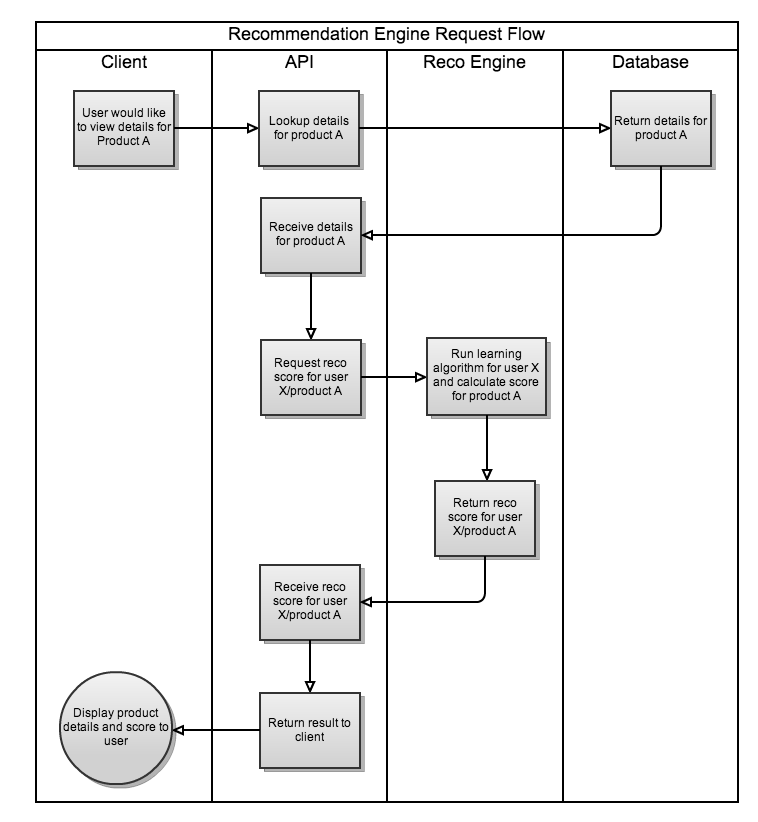

In [4]:
from IPython.core.display import Image 
Image(filename='/Users/chengjun/GitHub/cjc2016/figure/recsys_arch.png')

## The CourseTalk dataset: loading and first look

Loading of the CourseTalk database.

The CourseTalk data is spread across three files. Using the `pd.read_table`
method we load each file:


In [5]:
import pandas as pd

unames = ['user_id', 'username']
users = pd.read_table('/Users/chengjun/GitHub/cjc2016/data/users_set.dat',
                      sep='|', header=None, names=unames)

rnames = ['user_id', 'course_id', 'rating']
ratings = pd.read_table('/Users/chengjun/GitHub/cjc2016/data/ratings.dat',
                        sep='|', header=None, names=rnames)

mnames = ['course_id', 'title', 'avg_rating', 'workload', 'university', 'difficulty', 'provider']
courses = pd.read_table('/Users/chengjun/GitHub/cjc2016/data/cursos.dat',
                       sep='|', header=None, names=mnames)

# show how one of them looks
ratings.head(10)

,user_id,course_id,rating
0,1,1,5
1,2,1,5
2,3,1,5
3,4,1,5
4,5,1,5
5,6,1,5
6,7,1,5
7,8,1,5
8,9,1,5
9,10,1,5


In [6]:
# show how one of them looks
users[:5]

,user_id,username
0,1,patrickdijusto1
1,2,natalya_ivanova
2,3,justineittreim
3,4,ronmay
4,5,paulstock


In [7]:
courses[:5]

,course_id,title,avg_rating,workload,university,difficulty,provider
0,1,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera
1,2,Modern &amp; Contemporary American Poetry,4.9,5-9 hours/week,University of Pennsylvania,Easy/medium,coursera
2,3,A Beginner&#39;s Guide to Irrational Behavior,4.9,7-10 hours/week,Duke University,Medium,coursera
3,4,Design: Creation of Artifacts in Society,4.9,5-10 hours/week,University of Pennsylvania,Medium,coursera
4,5,Greek and Roman Mythology,4.9,8-10 hours/week,University of Pennsylvania,Medium,coursera


Using `pd.merge` we get it all into  one big DataFrame.

In [8]:
coursetalk = pd.merge(pd.merge(ratings, courses), users)
coursetalk

,user_id,course_id,rating,title,avg_rating,workload,university,difficulty,provider,username
0,1,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,patrickdijusto1
1,2,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,natalya_ivanova
2,3,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,justineittreim
3,4,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,ronmay
4,5,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,paulstock
5,6,1,5.0,An Introduction to Interactive Programming in ...,4.9,7-10 hours/week,Rice University,Medium,coursera,boyarsky
6,6,11,4.5,Functional Programming Principles in Scala,4.8,5-7 hours/week,Ecole Polytechnique Federale de Lausanne,Medium/hard,coursera,boyarsky
7,6,12,4.0,Gamification,4.8,4-8 hours/week,University of Pennsylvania,Easy/medium,coursera,boyarsky
8,6,19,5.0,M101P: MongoDB for Developers,4.7,TBA,NaN,Medium,None,boyarsky
9,6,21,5.0,6.002x: Circuits and Electronics,4.7,12 hours/week.,MIT,Medium/hard,edx,boyarsky


In [9]:
coursetalk.ix[0]

user_id                                                       1
course_id                                                     1
rating                                                        5
title         An Introduction to Interactive Programming in ...
avg_rating                                                  4.9
workload                                        7-10 hours/week
university                                      Rice University
difficulty                                               Medium
provider                                               coursera
username                                        patrickdijusto1
Name: 0, dtype: object

### Collaborative filtering: generalizations of the aggregation function

#### Non-personalized recommendations


### Groupby

The idea of groupby is that of *split-apply-combine*:

- split data in an object according to a given key;
- apply a function to each subset;
- combine results into a new object.

 To get mean course ratings grouped by the provider, we can use the pivot_table method:

In [14]:
dir(pivot_table)

['__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__hash__',
 '__init__',
 '__module__',
 '__name__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'func_closure',
 'func_code',
 'func_defaults',
 'func_dict',
 'func_doc',
 'func_globals',
 'func_name']

In [15]:
from pandas import pivot_table
mean_ratings = pivot_table(coursetalk, values = 'rating', columns='provider', aggfunc='mean')
mean_ratings.order(ascending=False)

provider
None            4.562500
coursera        4.527835
edx             4.491620
codecademy      4.450000
udacity         4.241071
udemy           4.200000
open2study      4.083333
khanacademy     4.000000
novoed          3.281250
mruniversity    3.250000
Name: rating, dtype: float64

Now let's filter down to courses that received at least 20 ratings (a completely arbitrary number);
To do this, I group the data by course_id and use size() to get a Series of group sizes for each title:

In [16]:
ratings_by_title = coursetalk.groupby('title').size()
ratings_by_title[:10]

title
14.73x: The Challenges of Global Poverty                     2
2.01x: Elements of Structures                                2
3.091x: Introduction to Solid State Chemistry                3
6.002x: Circuits and Electronics                            10
6.00x: Introduction to Computer Science and Programming     21
7.00x: Introduction to Biology - The Secret of Life          3
8.02x: Electricity and Magnetism                             3
8.MReVx: Mechanics ReView                                    1
A Beginner&#39;s Guide to Irrational Behavior              147
A Crash Course on Creativity                                 5
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 20]
active_titles[:10]

Index([u'6.00x: Introduction to Computer Science and Programming',
       u'A Beginner&#39;s Guide to Irrational Behavior',
       u'An Introduction to Interactive Programming in Python',
       u'An Introduction to Operations Management',
       u'CS-191x: Quantum Mechanics and Quantum Computation',
       u'CS188.1x Artificial Intelligence', u'Calculus: Single Variable',
       u'Computing for Data Analysis',
       u'Critical Thinking in Global Challenges', u'Cryptography I'],
      dtype='object', name=u'title')

The index of titles receiving at least 20 ratings can then be used to select rows from mean_ratings above:


In [18]:
mean_ratings = coursetalk.pivot_table('rating', columns='title', aggfunc='mean')
mean_ratings

title
14.73x: The Challenges of Global Poverty                                      4.250000
2.01x: Elements of Structures                                                 4.750000
3.091x: Introduction to Solid State Chemistry                                 4.166667
6.002x: Circuits and Electronics                                              4.800000
6.00x: Introduction to Computer Science and Programming                       4.166667
7.00x: Introduction to Biology - The Secret of Life                           4.666667
8.02x: Electricity and Magnetism                                              4.333333
8.MReVx: Mechanics ReView                                                     5.000000
A Beginner&#39;s Guide to Irrational Behavior                                 4.874150
A Crash Course on Creativity                                                  3.500000
A History of the World since 1300                                             4.318182
A Look at Nuclear Science and Technol

By computing the mean rating for each course, we will order with the highest rating listed first.


In [19]:
mean_ratings.ix[active_titles].order(ascending=False)

title
An Introduction to Interactive Programming in Python             4.915652
Modern &amp; Contemporary American Poetry                        4.901515
Design: Creation of Artifacts in Society                         4.879581
A Beginner&#39;s Guide to Irrational Behavior                    4.874150
Greek and Roman Mythology                                        4.864198
Calculus: Single Variable                                        4.854167
CS188.1x Artificial Intelligence                                 4.833333
Machine Learning                                                 4.830000
Functional Programming Principles in Scala                       4.822581
Gamification                                                     4.796296
An Introduction to Operations Management                         4.785714
The Modern World: Global History since 1760                      4.775862
Programming Languages                                            4.770833
CS-191x: Quantum Mechanics and Q

To see the top courses among Coursera students, we can sort by the 'Coursera' column in descending order:


In [20]:
mean_ratings = coursetalk.pivot_table('rating', index='title',columns='provider', aggfunc='mean')
mean_ratings[:10]

provider,None,codecademy,coursera,edx,khanacademy,mruniversity,novoed,open2study,udacity,udemy
title,,,,,,,,,,
14.73x: The Challenges of Global Poverty,NaN,NaN,NaN,4.250000,NaN,NaN,NaN,NaN,NaN,NaN
2.01x: Elements of Structures,NaN,NaN,NaN,4.750000,NaN,NaN,NaN,NaN,NaN,NaN
3.091x: Introduction to Solid State Chemistry,NaN,NaN,NaN,4.166667,NaN,NaN,NaN,NaN,NaN,NaN
6.002x: Circuits and Electronics,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,NaN,NaN
6.00x: Introduction to Computer Science and Programming,NaN,NaN,NaN,4.166667,NaN,NaN,NaN,NaN,NaN,NaN
7.00x: Introduction to Biology - The Secret of Life,NaN,NaN,NaN,4.666667,NaN,NaN,NaN,NaN,NaN,NaN
8.02x: Electricity and Magnetism,NaN,NaN,NaN,4.333333,NaN,NaN,NaN,NaN,NaN,NaN
8.MReVx: Mechanics ReView,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
A Beginner&#39;s Guide to Irrational Behavior,NaN,NaN,4.87415,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
mean_ratings['coursera'][active_titles].order(ascending=False)[:10]

title
An Introduction to Interactive Programming in Python    4.915652
Modern &amp; Contemporary American Poetry               4.901515
Design: Creation of Artifacts in Society                4.879581
A Beginner&#39;s Guide to Irrational Behavior           4.874150
Greek and Roman Mythology                               4.864198
Calculus: Single Variable                               4.854167
Programming Languages                                   4.850000
Machine Learning                                        4.830000
Functional Programming Principles in Scala              4.822581
Gamification                                            4.796296
Name: coursera, dtype: float64


Now, let's go further!  How about rank the courses with the highest percentage of ratings that are 4 or higher ?  % of ratings 4+


Let's start with a simple pivoting example that does not involve any aggregation. We can extract a ratings matrix as follows:


In [23]:
# transform the ratings frame into a ratings matrix
ratings_mtx_df = coursetalk.pivot_table(values='rating',
                                             index='user_id',
                                             columns='title')
ratings_mtx_df.ix[ratings_mtx_df.index[:15], ratings_mtx_df.columns[:15]]

title,14.73x: The Challenges of Global Poverty,2.01x: Elements of Structures,3.091x: Introduction to Solid State Chemistry,6.002x: Circuits and Electronics,6.00x: Introduction to Computer Science and Programming,7.00x: Introduction to Biology - The Secret of Life,8.02x: Electricity and Magnetism,8.MReVx: Mechanics ReView,A Beginner&#39;s Guide to Irrational Behavior,A Crash Course on Creativity,A History of the World since 1300,A Look at Nuclear Science and Technology,"A New History for a New China, 1700-2000: New Data and New Methods, Part 1",AIDS,Aboriginal Worldviews and Education
user_id,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's extract only the rating that are 4 or higher.

In [24]:
ratings_gte_4 = ratings_mtx_df[ratings_mtx_df>=4.0]
# with an integer axis index only label-based indexing is possible

ratings_gte_4.ix[ratings_gte_4.index[:15], ratings_gte_4.columns[:15]]

title,14.73x: The Challenges of Global Poverty,2.01x: Elements of Structures,3.091x: Introduction to Solid State Chemistry,6.002x: Circuits and Electronics,6.00x: Introduction to Computer Science and Programming,7.00x: Introduction to Biology - The Secret of Life,8.02x: Electricity and Magnetism,8.MReVx: Mechanics ReView,A Beginner&#39;s Guide to Irrational Behavior,A Crash Course on Creativity,A History of the World since 1300,A Look at Nuclear Science and Technology,"A New History for a New China, 1700-2000: New Data and New Methods, Part 1",AIDS,Aboriginal Worldviews and Education
user_id,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now picking the number of total ratings for each course and the count of ratings 4+ , we can merge them into one DataFrame.

In [25]:
ratings_gte_4_pd = pd.DataFrame({'total': ratings_mtx_df.count(), 'gte_4': ratings_gte_4.count()})
ratings_gte_4_pd.head(10)

,gte_4,total
title,,
14.73x: The Challenges of Global Poverty,2,2
2.01x: Elements of Structures,2,2
3.091x: Introduction to Solid State Chemistry,2,3
6.002x: Circuits and Electronics,10,10
6.00x: Introduction to Computer Science and Programming,15,21
7.00x: Introduction to Biology - The Secret of Life,3,3
8.02x: Electricity and Magnetism,2,3
8.MReVx: Mechanics ReView,1,1
A Beginner&#39;s Guide to Irrational Behavior,146,147


In [26]:
ratings_gte_4_pd['gte_4_ratio'] = (ratings_gte_4_pd['gte_4'] * 1.0)/ ratings_gte_4_pd.total
ratings_gte_4_pd.head(10)

,gte_4,total,gte_4_ratio
title,,,
14.73x: The Challenges of Global Poverty,2,2,1.000000
2.01x: Elements of Structures,2,2,1.000000
3.091x: Introduction to Solid State Chemistry,2,3,0.666667
6.002x: Circuits and Electronics,10,10,1.000000
6.00x: Introduction to Computer Science and Programming,15,21,0.714286
7.00x: Introduction to Biology - The Secret of Life,3,3,1.000000
8.02x: Electricity and Magnetism,2,3,0.666667
8.MReVx: Mechanics ReView,1,1,1.000000
A Beginner&#39;s Guide to Irrational Behavior,146,147,0.993197


In [27]:
ranking = [(title,total,gte_4, score) for title, total, gte_4, score in ratings_gte_4_pd.itertuples()]

for title, total, gte_4, score in sorted(ranking, key=lambda x: (x[3], x[2], x[1])  , reverse=True)[:10]:
    print title, total, gte_4, score

Functional Programming Principles in Scala 31 31 1.0
Introduction to Computer Science 24 24 1.0
Programming Languages 24 24 1.0
Web Development 16 16 1.0
6.002x: Circuits and Electronics 10 10 1.0
Compilers 8 8 1.0
Archaeology&#39;s Dirty Little Secrets 7 7 1.0
How to Build a Startup 7 7 1.0
Introduction to Sociology 7 7 1.0
Stat2.1X: Introduction to Statistics: Descriptive Statistics 7 7 1.0


Let's now go easy. Let's count the number of ratings for each course, and order with the most number of ratings.


In [28]:
ratings_by_title = coursetalk.groupby('title').size()
ratings_by_title.order(ascending=False)[:10]

title
An Introduction to Interactive Programming in Python    575
Design: Creation of Artifacts in Society                191
A Beginner&#39;s Guide to Irrational Behavior           147
Modern &amp; Contemporary American Poetry               132
An Introduction to Operations Management                 98
Greek and Roman Mythology                                81
Critical Thinking in Global Challenges                   65
Gamification                                             54
Machine Learning                                         50
Web Intelligence and Big Data                            43
dtype: int64

Considering this information we can sort by the most rated ones with highest percentage of 4+ ratings.

In [29]:
for title, total, gte_4, score in sorted(ranking, key=lambda x: (x[2], x[3], x[1])  , reverse=True)[:10]:
    print title, total, gte_4, score

An Introduction to Interactive Programming in Python 572 575 0.994782608696
Design: Creation of Artifacts in Society 190 191 0.994764397906
A Beginner&#39;s Guide to Irrational Behavior 146 147 0.993197278912
Modern &amp; Contemporary American Poetry 130 132 0.984848484848
An Introduction to Operations Management 96 98 0.979591836735
Greek and Roman Mythology 80 81 0.987654320988
Critical Thinking in Global Challenges 47 65 0.723076923077
Gamification 52 54 0.962962962963
Machine Learning 48 49 0.979591836735
Web Intelligence and Big Data 26 43 0.604651162791


Finally using the formula above that we learned, let's find out what the courses that most often occur wit the popular MOOC An introduction to Interactive Programming with Python by using the method "x + y/ x" .  For each course, calculate the percentage of Programming with python raters who also rated that course. Order with the highest percentage first, and voilá we have the top 5 moocs.

In [31]:
course_users = coursetalk.pivot_table('rating', index='title', columns='user_id')
course_users.ix[course_users.index[:15], course_users.columns[:15]]

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
title,,,,,,,,,,,,,,,
14.73x: The Challenges of Global Poverty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.01x: Elements of Structures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.091x: Introduction to Solid State Chemistry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.002x: Circuits and Electronics,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.00x: Introduction to Computer Science and Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.00x: Introduction to Biology - The Secret of Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.02x: Electricity and Magnetism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.MReVx: Mechanics ReView,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beginner&#39;s Guide to Irrational Behavior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First, let's get only the users that rated the course An Introduction to Interactive Programming in Python

In [32]:
ratings_by_course = coursetalk[coursetalk.title == 'An Introduction to Interactive Programming in Python']
ratings_by_course.set_index('user_id', inplace=True)

Now, for all other courses let's filter out only the ratings from users that  rated the Python course.

In [33]:
their_ids = ratings_by_course.index
their_ratings = course_users[their_ids]
course_users[their_ids].ix[course_users[their_ids].index[:15], course_users[their_ids].columns[:15]]

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
title,,,,,,,,,,,,,,,
14.73x: The Challenges of Global Poverty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.01x: Elements of Structures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.091x: Introduction to Solid State Chemistry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.002x: Circuits and Electronics,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.00x: Introduction to Computer Science and Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.00x: Introduction to Biology - The Secret of Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.02x: Electricity and Magnetism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.MReVx: Mechanics ReView,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beginner&#39;s Guide to Irrational Behavior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By applying the division: number of ratings who rated Python Course and the given course / total of ratings who rated the Python Course we have  our percentage.

In [34]:
course_count =  their_ratings.ix['An Introduction to Interactive Programming in Python'].count()
sims = their_ratings.apply(lambda profile: profile.count() / float(course_count) , axis=1)

Ordering by the score, highest first excepts the first one which contains the course itself.

In [35]:
sims.order(ascending=False)[1:][:10]

title
Cryptography I                             0.006957
Machine Learning                           0.006957
CS-169.1x: Software as a Service           0.005217
Python                                     0.005217
Introduction to Computer Science           0.005217
Human-Computer Interaction                 0.005217
Computational Investing, Part I            0.005217
Learn to Program: Crafting Quality Code    0.005217
Web Development                            0.005217
Gamification                               0.005217
dtype: float64